# Stockholm Airbnb Listing 2024 EDA

The data comes from "Inside Airbnb" a mission driven project that provides data and advocacy about Airbnb's impact on residential communities.

Their goal is to work towards a vision where communities are empowered with data and information to understand, decide and control the role of renting residential homes to tourists.



## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [ ]:
data = pd.read_csv('/data/stockholm-2024-listings.csv')

In [5]:
# First look at a sample of the dataset
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,32984,https://www.airbnb.com/rooms/32984,20240629155714,2024-06-29,previous scrape,"City Hall, Stockholm",NaN,NaN,https://a0.muscache.com/pictures/33201582/1ac7...,53396,...,4.52,4.81,4.20,NaN,f,1,1,0,0,0.14
1,155220,https://www.airbnb.com/rooms/155220,20240629155714,2024-06-29,city scrape,"Stockholm, new spacoius villa",NaN,Close to nature and easy access to citylife.,https://a0.muscache.com/pictures/hosting/Hosti...,746396,...,3.33,4.67,2.33,NaN,f,2,2,0,0,0.13
2,164448,https://www.airbnb.com/rooms/164448,20240629155714,2024-06-29,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,NaN,https://a0.muscache.com/pictures/f56d8d10-a7fa...,784312,...,4.97,4.83,4.76,NaN,f,2,0,2,0,2.64
3,220851,https://www.airbnb.com/rooms/220851,20240629155714,2024-06-29,city scrape,One room in appartement,Welcome!,Many restaurangs wery close and walkingdistanc...,https://a0.muscache.com/pictures/2085606/7a706...,412283,...,4.87,4.82,4.70,NaN,f,1,0,1,0,0.41
4,238411,https://www.airbnb.com/rooms/238411,20240629155714,2024-06-29,city scrape,Cozy apartment in central Stockholm,NaN,"Restaurants, cafés, museums, art galleries, pa...",https://a0.muscache.com/pictures/2806060/7fc68...,1250232,...,4.95,4.85,4.63,NaN,f,1,1,0,0,0.72


In [6]:
# Review dataset rows and columns
data.shape

(5400, 75)

In [7]:
# Review statistical description of the dataset
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.400000e+03,5.400000e+03,5.400000e+03,5400.000000,5400.000000,0.0,5400.000000,5400.000000,5400.000000,4058.000000,...,4099.000000,4099.000000,4099.000000,4099.000000,0.0,5400.000000,5400.000000,5400.000000,5400.000000,4104.000000
mean,5.755700e+17,2.024063e+13,1.767069e+08,8.884074,16.032778,NaN,59.318606,18.030483,3.442037,1.305200,...,4.867668,4.882054,4.816929,4.732596,NaN,3.983704,3.468519,0.463889,0.031111,1.228431
std,4.911557e+17,1.668123e+00,1.852657e+08,81.155210,206.493970,NaN,0.031424,0.064684,1.966465,0.658229,...,0.309343,0.304225,0.304746,0.371786,NaN,9.724417,9.710599,1.741646,0.329107,2.401779
min,3.298400e+04,2.024063e+13,4.457000e+03,1.000000,1.000000,NaN,59.231950,17.773110,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.524761e+07,2.024063e+13,2.306232e+07,1.000000,1.000000,NaN,59.298658,18.000505,2.000000,1.000000,...,4.850000,4.880000,4.750000,4.650000,NaN,1.000000,1.000000,0.000000,0.000000,0.200000
50%,7.353559e+17,2.024063e+13,8.775228e+07,1.000000,2.000000,NaN,59.317566,18.046597,3.000000,1.000000,...,4.980000,5.000000,4.910000,4.810000,NaN,1.000000,1.000000,0.000000,0.000000,0.555000
75%,1.042079e+18,2.024063e+13,3.108355e+08,2.000000,3.000000,NaN,59.338421,18.076305,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.460000
max,1.189065e+18,2.024063e+13,5.860339e+08,2636.000000,6436.000000,NaN,59.418950,18.178700,16.000000,9.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,60.000000,60.000000,21.000000,6.000000,73.260000


In [8]:
# Review a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5400 non-null   int64  
 1   listing_url                                   5400 non-null   object 
 2   scrape_id                                     5400 non-null   int64  
 3   last_scraped                                  5400 non-null   object 
 4   source                                        5400 non-null   object 
 5   name                                          5400 non-null   object 
 6   description                                   5162 non-null   object 
 7   neighborhood_overview                         2029 non-null   object 
 8   picture_url                                   5400 non-null   object 
 9   host_id                                       5400 non-null   i

## Data Cleaning

In [9]:
# Drop only NA columns
df = data.copy().dropna(axis=1, how='all')
df.shape

(5400, 72)

There were 3 columns with all values as N/A that ended up being dropped, neighbourhood_group_cleansed, calendar_updated, license.

In [10]:
# Drop duplicated rows
df = df.drop_duplicates()
df.shape

(5400, 72)

No duplicated records were found.

In [11]:
# Drop duplicated columns based on all records

# Check which columns match the behaviour
duplicated = df.T[df.T.duplicated(keep=False)].index.tolist()
print(duplicated)

# Drop columns
df = df.drop(columns=duplicated[1])
df.shape

['last_scraped', 'calendar_last_scraped']


(5400, 71)

There were 2 columns with matching values across all records, and based on the column name and values, it seemed to be a redundant column, hence one of the columns were dropped.

In [12]:
# Drop all url related columns as they dont add to our analysis
url_related = [c for c in df.columns if 'url' in c]
df = df.drop(columns=url_related)
print(url_related)
df.shape

['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']


(5400, 66)

There were 5 columns with url content that was dropped.

In [13]:
# Drop columns with only one single unique value
#unique_values = df.columns[df.nunique()==1].tolist()
unique_values = [c for c in df.columns if df[c].nunique() == 1]
print(unique_values)
df = df.drop(columns=unique_values)
df.shape

['scrape_id', 'last_scraped']


(5400, 64)

There were 2 columns with 1 unique value across all records.

In [14]:
# Review and get all currency columns
# List columns that has values with '$' character
dollar_columns = [c for c in df.columns if df[c].astype(str).str.contains('\$').any()]
print("Columns with $ character",dollar_columns)
print("Price value samples")
df[dollar_columns].head()

# Refactor only price column as description is a text based column
new_price = df["price"].str.replace(r"$", "").str.replace(',', '').astype(np.float32)
df["price"] = new_price
df["price"].head()

Columns with $ character ['description', 'price']
Price value samples


,price
0,NaN
1,995.0
2,951.0
3,450.0
4,1272.0


In [15]:
df.shape

(5400, 64)

In [16]:
# Review NA ratio and determine if column need to be dropped
df.isna().sum().sort_values(ascending=False).apply(lambda x: x/df.shape[0])

high_na_columns = df.isna().sum().sort_values(ascending=False).apply(lambda x: x/df.shape[0])
columns_to_drop = high_na_columns[high_na_columns > 0.50].index.tolist()
print(columns_to_drop)

df = df.drop(columns=columns_to_drop)
df.shape

['host_neighbourhood', 'neighbourhood', 'neighborhood_overview', 'host_about']


(5400, 60)

There were 4 columns dropped for having high ratio of N/A values, greater than 50% of the total records.

In [17]:
# Drop host profile related information
host_related = df.columns[df.columns.str.contains(r'^host_')]
df = df.drop(axis=1, columns=host_related)
print(host_related)
df.shape

Index(['host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified'],
      dtype='object')


(5400, 47)

There were 13 columns related to host profile information that was dropped.

In [18]:
# Get all the Boolean values
boolean_columns = df.columns[df.isin(["t","f"]).any()].to_list()
print(boolean_columns)
# Refactor Boolean values
df[boolean_columns] = df[boolean_columns].replace({'t': True, 'f': False}).astype(bool)
df[boolean_columns].head()

['has_availability', 'instant_bookable']


,has_availability,instant_bookable
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


There were 2 columns with boolean characteristics that was refactored.

In [19]:
# Review N/A values and use median or mode to fill the missing values.
df.isna().sum().sort_values(ascending=False).head(10)

,0
price,1380
bathrooms,1342
beds,1341
review_scores_communication,1301
review_scores_accuracy,1301
review_scores_cleanliness,1301
review_scores_checkin,1301
review_scores_value,1301
review_scores_location,1301
first_review,1296


In [20]:
# Fill NA values with median and mode
df = df.fillna(df.select_dtypes(exclude=object).median())
df = df.fillna(df.select_dtypes(include=object).mode().iloc[0])

# Check na-filled dataset
df.isna().sum().sort_values(ascending=False).head(10)

,0
id,0
review_scores_accuracy,0
availability_60,0
availability_90,0
availability_365,0
number_of_reviews,0
number_of_reviews_ltm,0
number_of_reviews_l30d,0
first_review,0
last_review,0


## Exploratoy Data Analysis

### General Statistics

In [21]:
# Descriptive Statistics for Price
df['price'].describe()

,price
count,5400.000000
mean,1727.503906
std,6918.378906
min,105.000000
25%,1000.000000
50%,1329.500000
75%,1802.250000
max,500000.000000


The average price of Airbnb listing in Stockholm is **1727.50 USD**, the median is **1329.50 USD** indicating that the price is skewed to the right (positively skewed) as the mean is higher than the median. Another indication that confirms our positively skewed analysis is the existence of very high outliers in price on the higher end.

In [22]:
# Rooms and Review Scores
df[['bedrooms','bathrooms','review_scores_rating']].describe()

,bedrooms,bathrooms,review_scores_rating
count,5400.000000,5400.000000,5400.000000
mean,1.667407,1.229352,4.843381
std,1.147137,0.585637,0.298866
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,4.820000
50%,1.000000,1.000000,4.930000
75%,2.000000,1.000000,5.000000
max,12.000000,9.000000,5.000000


The average number of bedrooms in Stockholm's Airbnb seems to be 1.67, and for for bathrooms is 1.23, but this is probably skewed due to outliers on the right.
The usual amount of bedrooms and bathrooms seems 1, with some bedroom sometimes reaching 2.

The average review for Stockholm's Airbnb listing is **4.84/5** which is quite high considering that the median review is also **4.93/5**.

In [23]:
# Average occupancy rates estimation
annual_avg_availability = df['availability_365'].mean()
print(f"Stockholm's Airbnb average annual availability: {annual_avg_availability.round(2)}/365")
estimated_annual_occupancy_rate = 100 - (annual_avg_availability / 365 * 100)
print(f"Stockholm's Airbnb estimated annual occupancy rate: {estimated_annual_occupancy_rate.round(2)}%")

Stockholm's Airbnb average annual availability: 128.96/365
Stockholm's Airbnb estimated annual occupancy rate: 64.67%


Looking at the occupancy rate by it self does provide much insights, but we can compare this value to other countries Airbnb to get a better picture whether this is a good or bad rate.

In [24]:
# Top 10 listed property types
property_types_count = df['property_type'].value_counts()
property_types_count.head(10)

,count
property_type,
Entire rental unit,2975
Private room in rental unit,617
Entire home,494
Entire condo,490
Entire villa,164
Entire townhouse,88
Room in hotel,68
Private room in condo,67
Private room in home,62


In [25]:
# Top 10 Listed Neighbourhood
neighbourhood_count = df['neighbourhood_cleansed'].value_counts()
neighbourhood_count.head(10)

,count
neighbourhood_cleansed,
Södermalms,1385
Norrmalms,574
Kungsholmens,534
Hägersten-Liljeholmens,531
Enskede-Årsta-Vantörs,485
Östermalms,385
Bromma,343
Skarpnäcks,280
Älvsjö,197


### Visualization

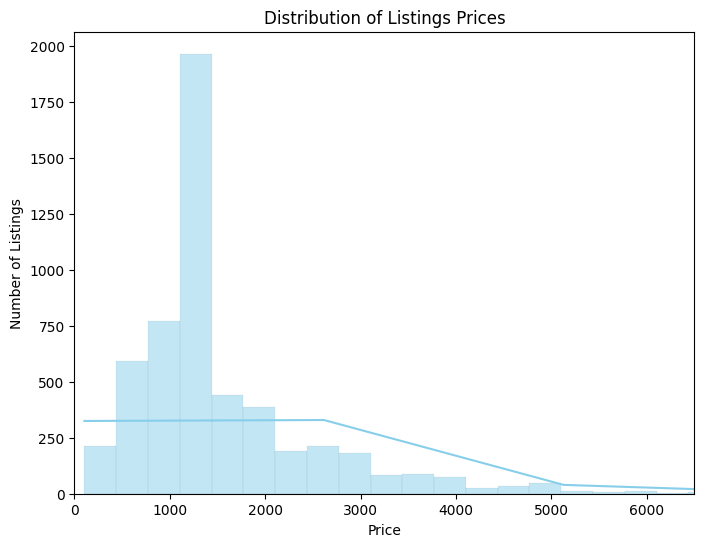

In [26]:
# General Price Distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="price",bins=1500,kde=True,color="skyblue")
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings Prices')

plt.xlim(0,df["price"].quantile(0.99))

plt.show()

There seems to be a lot of listed properties within the price range of **1100 USD - 1300 USD**. Additionally, the distribution is positively skewed due to some very expensive listed properties in the dataset.

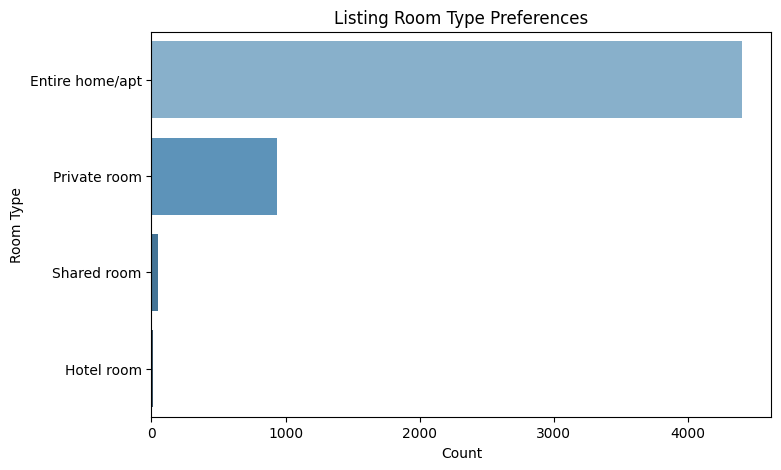

In [27]:
# Listing Room Type Preferences
plt.figure(figsize=(8,5))
sns.countplot(data=df,y="room_type",palette="Blues_d")
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.title('Listing Room Type Preferences')

plt.show()

The most popular listed room types seems to be for **entire properties** followed by **private rooms**.

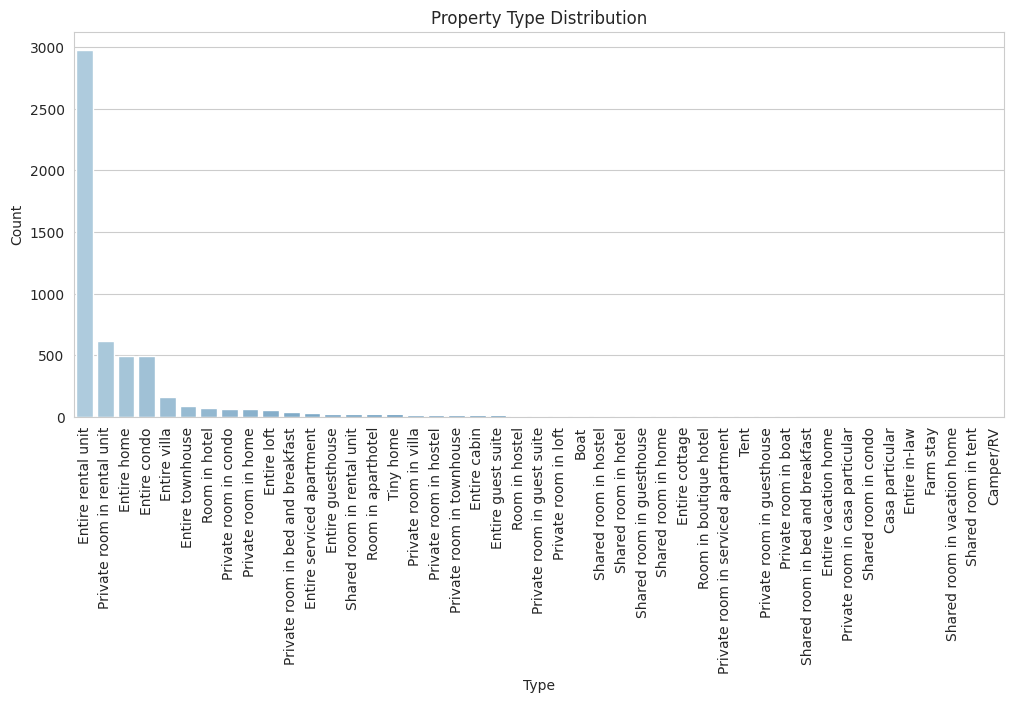

In [28]:
# Listing Property Type Distribution
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(data=df, x='property_type',palette="Blues_d",order=df['property_type'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Property Type Distribution')
plt.xticks(rotation=90)

plt.show()

The properties types distribution seems to confirm the previous plot where the most popular types of listed properties tend to be **entire units** (rental unit, home, condo, etc) and **private room** inside a rental unit.

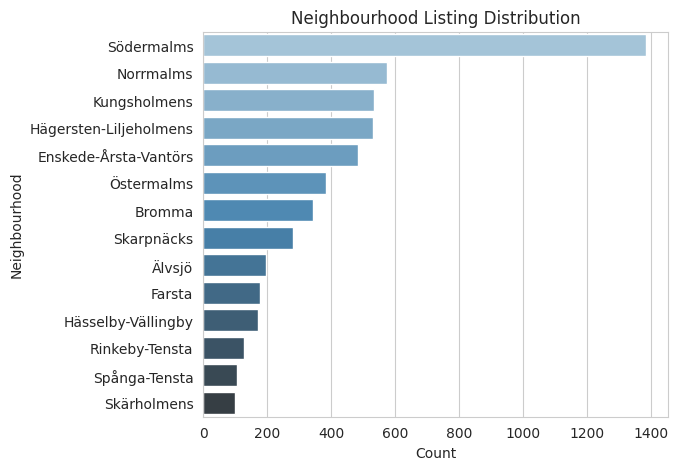

In [29]:
# Neighbourhood listing distribution
plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
sns.countplot(data=df,y='neighbourhood_cleansed',palette="Blues_d",order=df['neighbourhood_cleansed'].value_counts().index)
plt.ylabel('Neighbourhood')
plt.xlabel('Count')
plt.title('Neighbourhood Listing Distribution')
plt.show()

The neighbourhood with most airbnb listing by a great margin is **Sodermalms** and the neighbourhood with the least listings is **Skärholmens**.

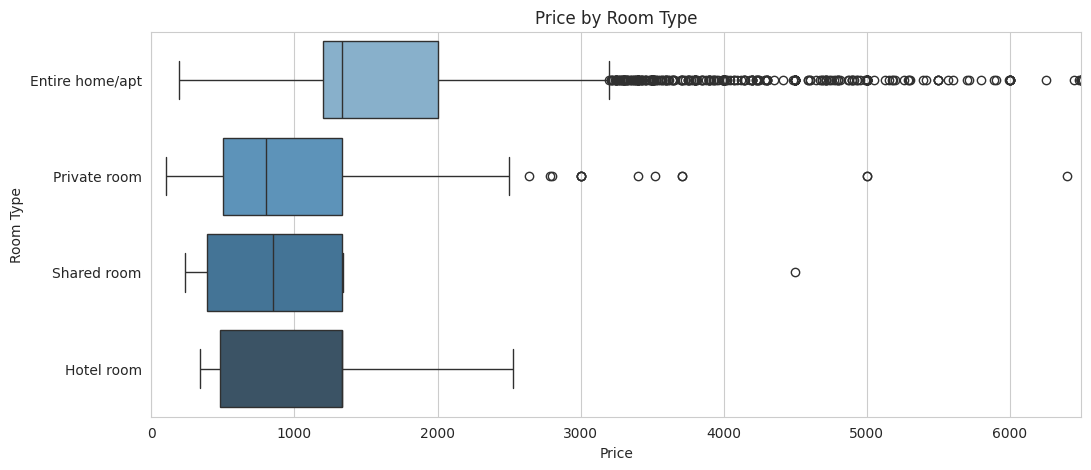

In [30]:
# Price by Room Type
plt.figure(figsize=(12,5))
sns.boxplot(data=df,y="room_type",x="price",palette="Blues_d")
plt.xlabel('Price')
plt.ylabel('Room Type')
plt.title('Price by Room Type')

plt.xlim(0,df["price"].quantile(0.99))

plt.show()

The relation between price and room type seems to indicate that:

*   Logically entire Home/Apartment listings tend to be more expensive than other single room types.
*   For entire home/apartment, the median price (around **1400 USD**) is closer to the 25th percentile (around **1300 USD**) than the 75th percentile (around **2000 USD**), indicating that there are much more expensive listing options to choose.
*   Private rooms pricing is more balanced but its median price is very similar to the shared rooms.
*   Private, Shared and Hotel rooms seems to share very similar Interquartile Range, probably due to properties owners trying to optimize profit while keeping prices within the other listing ranges to compete.
*   Private, Shared and Hotel rooms listings, seems to follow a trend where their **75th percentile aligns with the median price** for entire home/apt units, possibly also due entire home/apt competing prices.
*   There is one property listed for **half a million dollar**.


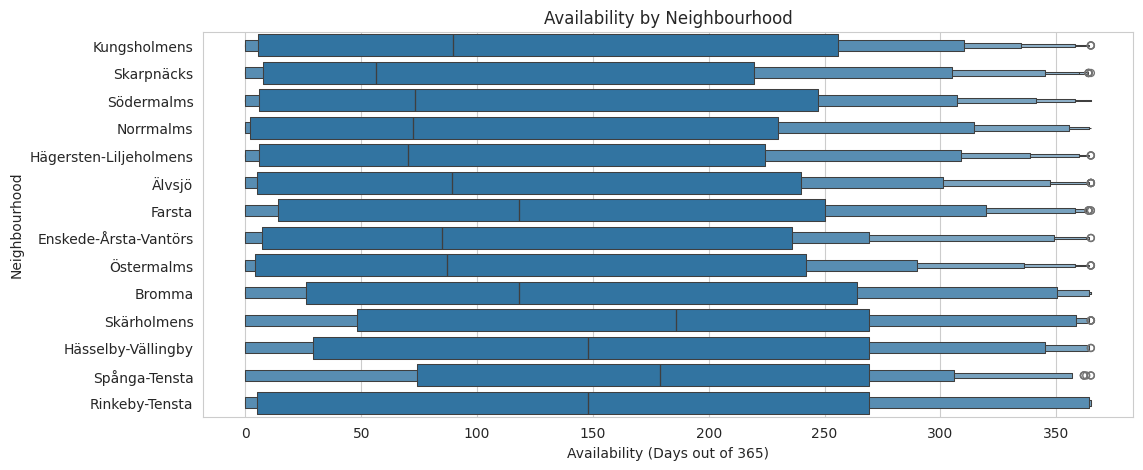

In [31]:
# Availability by Neighbourhood
plt.figure(figsize=(12,5))
sns.boxenplot(data=df,y="neighbourhood_cleansed",x="availability_365")
plt.xlabel('Availability (Days out of 365)')
plt.ylabel('Neighbourhood')
plt.title('Availability by Neighbourhood')

plt.show()

*  The neighbourhood with the highest ocupancy rate seems to be **Skarpnäcks**, according to previous plots this neighbourhood has around **280-300 listed properties** out of presumably 5400 (around 5.3%), with a median of around **55-60** available days throughout the year, resulting in an estimated yearly median ocupancy rate of around **84%**.
*  The neighbourhood with the lowest ocupancy rate is **Skärholmens**, with a median of around **180-185** available days throughout the year, yielding a estimated yearly ocupancy rate of **49%**, seeing that this neighbourhood has the lowest count of listed properties (around **100**), we can infer that there isn't that much listing because there isnt that much demand in the neighbourhood.
*  On the other hand, **Södermalms** which is the neighbourhood with the most listing (around **1400**), has an average of **75 days** available, this result in a estimated yearly occupancy rate of **79%**. An impressive results if you consider the vast amount of listing the neighbourhood have, although one could argue that the large offers if probably due to the large demand.


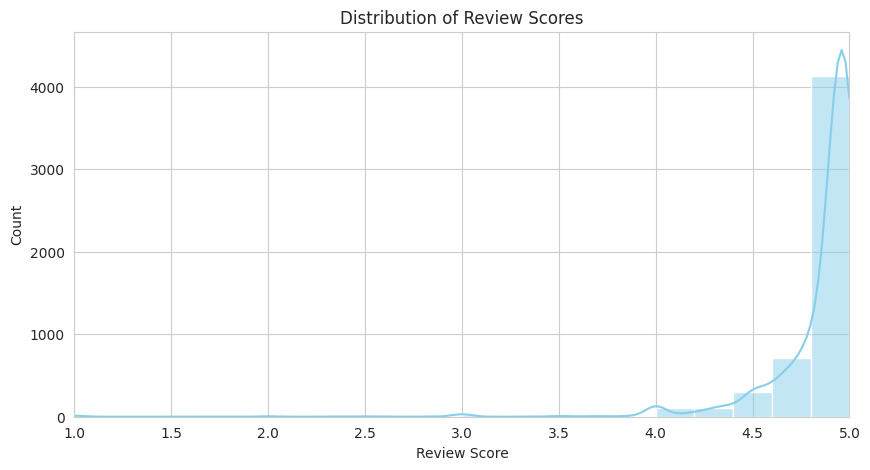

In [32]:
# Review Scores Distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df,x="review_scores_rating",bins=20,kde=True,color="skyblue")
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')
plt.xlim(1,5)
plt.show()

Overall the reviews for Stockholms Airbnb properties seems to be really great, with most listed options having reviews between **4.5-5.0**.

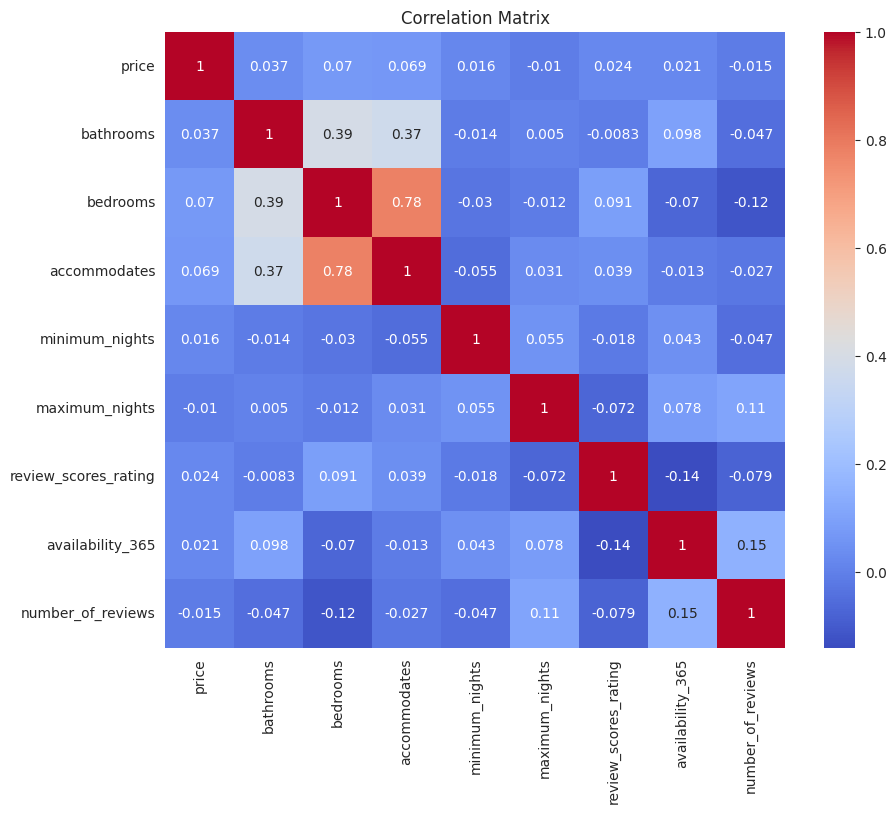

In [33]:
# Correlation between columns
# Pick relevant numeric values
relevant_columns = ['price','bathrooms','bedrooms','accommodates','minimum_nights', 'maximum_nights','review_scores_rating','availability_365','number_of_reviews']
corr_matrix = df[relevant_columns].corr()

# Viz
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Interestingly, according to the correlation matrix, the amount of people that a property can accomodate dont seem to be correlated with prices, this rather seem counterintuitive since the more people you can host in a property would likely indicate a larger property which in turn would indicate higher prices. We can try to analyze if this behaviour has to do with some of the extremely high prices outliers.

Let take a look at the data without some of the outliers to see if it affect the correction metrics.

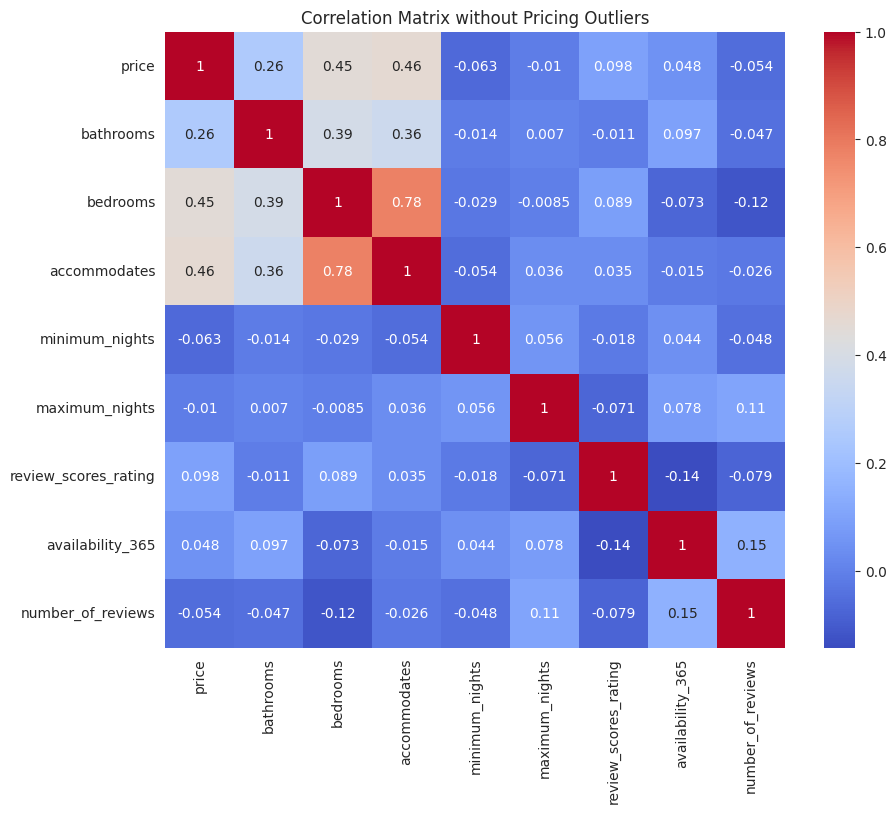

In [41]:
# Correlation Matrix without outliers.
## Create a copy of the dataset, remove the prices outliers and draw a new correlation matrix
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[df_no_outliers['price'] < df_no_outliers['price'].quantile(0.99)]

df_no_outliers_corr_matrix = df_no_outliers[relevant_columns].corr()

# Viz
plt.figure(figsize=(10,8))
sns.heatmap(df_no_outliers_corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix without Pricing Outliers')
plt.show()

After cutting out the outliers, the correlation between price and # of people the property can accomodate increase significantly (**from 0.069 to 0.46**). This is the highest correlation between the features if you don't take into consideration bedrooms and accomodates.

## Data Insights

**Pricing and Accomodation Types**

* Stockholm's Airbnb listings from 2024 exhibit a wide price range, from budget-friendly options to extremely expensive ones. The median price is around **1300 USD**, with a positively skewed distribution due to high-priced outliers.
* The most popular types of listings are **entire homes/apartments**, followed by **private rooms**. These also tend to be the more expensive options.
* The price seems to be **strongly influenced** by the **type of accommodation**.

**Neighbourhood Popularity**

* **Södermalms** and **Norrmalms** are the most popular neighbourhoods with a high number of listings, suggesting high demand in these areas.
* **Skarpnäcks** also has a very high occupancy rate despite having fewer listings, indicating strong demand.

**Review Scores & Customer Satisfaction**

* Airbnb listings in Stockholm have generally high review scores, with most properties receiving a **4.5-5.0** rating.
* This suggests that overall, the properties and services provided by Airbnb hosts in Stockholm are highly satisfactory to guests.

**Correlation & Influencing Factors**

* There is a **strong correlation** between the **number of people a property can accommodate** and its **price**, particularly after removing price outliers. This suggests that larger properties often command higher prices.
* Accommodates and bedrooms are highly correlated with price, indicating that size and number of rooms play a major role in determining price.

**Occupancy & Availability**

* The overall estimated annual occupancy rate for Stockholm Airbnb listings is **around 64.67%**.
* There are significant variations in occupancy rates across different neighbourhoods, likely due to varying levels of **demand** and **attractiveness**.
* **Skarpnäcks** has a very high occupancy rate (around 84%), while **Skärholmens** has a relatively low occupancy rate (around 49%).

**Insights for Potential Hosts and Visitors**

* **Hosts**: Understanding the popularity of different neighbourhoods and property types can be valuable for maximizing occupancy rates and setting competitive prices.
* **Visitors**: The analysis provides insights into average prices, popular neighbourhoods, and available accommodation types, which can help them make informed decisions when planning their trips.

## Further Exploration

* **Seasonality**: Investigating how prices and occupancy rates change seasonally could provide more granular insights.
* **Amenities**: Analyzing the correlation between different amenities and prices would help understand what features contribute to higher value properties.